# Prepare

In [6]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import calendar
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns  # 数据可视化模块


#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv('datasets/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [8]:
data_new = data['1995-01':'2024-07'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])
# 计算000001上证指数日收益率 两种：
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.8700,637.7200,647.7100,630.5300,639.8800,-0.012333
1995-01-04,639.8800,641.9000,655.5100,638.8600,653.8100,0.021770
1995-01-05,653.8100,655.3800,657.5200,645.8100,646.8900,-0.010584
1995-01-06,646.8900,642.7500,643.8900,636.3300,640.7600,-0.009476
1995-01-09,640.7600,637.5200,637.5500,625.0400,626.0000,-0.023035
...,...,...,...,...,...,...
2024-07-25,2901.9518,2891.8918,2897.7674,2872.8497,2886.7416,-0.005241
2024-07-26,2886.7416,2885.9953,2899.1162,2875.3959,2890.8973,0.001440
2024-07-29,2890.8973,2889.4726,2898.9512,2878.5825,2891.8453,0.000328


In [9]:
Month_data = data_new.resample('ME')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Month_data

,Ret
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2024-03-31,0.008622
2024-04-30,0.020932
2024-05-31,-0.005801


In [10]:
Quarter_data = data_new.resample('QE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Quarter_data

,Ret
Day,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2023-09-30,-0.028603
2023-12-31,-0.043575
2024-03-31,0.022263


In [11]:
Year_data = data_new.resample('YE')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name='Ret')
Year_data

,Ret
Day,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [12]:
# 为月度收益创建辅助字段，便于深入分析
Month_data['Year'] = Month_data.index.year
Month_data['Month'] = Month_data.index.month
Month_data['Month_name'] = Month_data.index.strftime('%b')
Month_data['Decade'] = (Month_data['Year'] // 10) * 10
Month_data['Rolling_ann_return'] = (1 + Month_data['Ret']).rolling(window=12, min_periods=12).apply(lambda x: np.prod(x) - 1, raw=True)
Month_data['Rolling_ann_vol'] = Month_data['Ret'].rolling(window=12, min_periods=12).std() * np.sqrt(12)
Month_data


,Ret,Year,Month,Month_name,Decade,Rolling_ann_return,Rolling_ann_vol
Day,,,,,,,
1995-01-31,-0.131631,1995,1,Jan,1990,NaN,NaN
1995-02-28,-0.023694,1995,2,Feb,1990,NaN,NaN
1995-03-31,0.177803,1995,3,Mar,1990,NaN,NaN
1995-04-30,-0.103552,1995,4,Apr,1990,NaN,NaN
1995-05-31,0.207922,1995,5,May,1990,NaN,NaN
...,...,...,...,...,...,...,...
2024-03-31,0.008622,2024,3,Mar,2020,-0.070792,0.134004
2024-04-30,0.020932,2024,4,Apr,2020,-0.065733,0.135051
2024-05-31,-0.005801,2024,5,May,2020,-0.036745,0.130866


# Think 要学会分析数据，思考数据，挖掘数据背后的故事
- 为什么股票市场的回报率如此之高？
- 为什么在股票市场回报率如此高的情况下，似乎也没有什么人能在股票市场挣钱？
- 我们能够提前预测股票市场回报率么？

## 数据可视化

### 月度数据

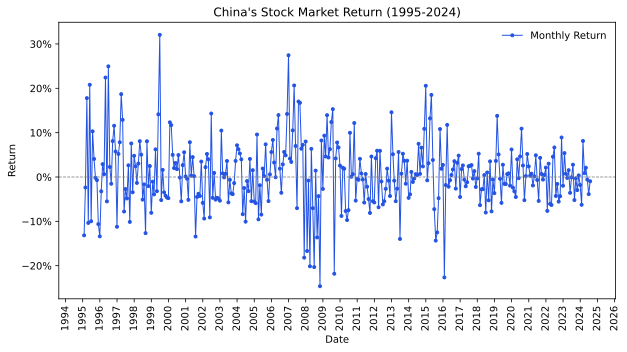

In [20]:
# 画图
fig, ax = plt.subplots(figsize=(10, 5)) # 图片比例
ax.plot(
    'Ret',  # 使用正确的列名 Ret
    '.-',  # 线的类型
    color = "#2353E3",  # 线的颜色 RGB
    label = 'Monthly Return',  # 更改为中文标签
    linewidth = 1,  # 线的粗细
    data = Month_data['1995-01-01':'2024-07-31'])  # 画图的数据
ax.set_title("China's Stock Market Return (1995-2024)") # 更简洁的标题
ax.set_xlabel('Date') # 将x轴名称改为中文
plt.ylabel('Return') # 将y轴名称改为中文

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 添加百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加图例
plt.legend(loc='upper right', frameon=False, fontsize=10)

# 图例添加在具体的位置
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False, fontsize=10)

# 添加水平参考线表示零收益
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 保存图片
fig.savefig('images/Monthly_return.pdf', bbox_inches='tight')
plt.show();

In [11]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs
) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on th

# 季度数据

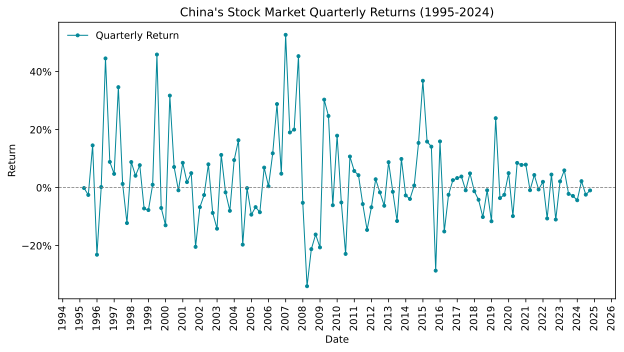

In [21]:
# 画图
fig, ax = plt.subplots(figsize=(10, 5)) # 图片比例
ax.plot(
    Quarter_data.index,  # x轴数据
    Quarter_data['Ret'],  # y轴数据
    '.-',  # 线的类型
    color = "#038798",  # 线的颜色 RGB
    label = 'Quarterly Return',  # 更改为季度收益率标签
    linewidth = 1,  # 线的粗细
)
ax.set_title("China's Stock Market Quarterly Returns (1995-2024)") # 更精确的标题
ax.set_xlabel('Date') # 更改x轴名称
plt.ylabel('Return') # y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 添加水平参考线表示零收益
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)

fig.savefig('images/Quarterly_return.pdf', bbox_inches='tight')
plt.show();

# 年度数据

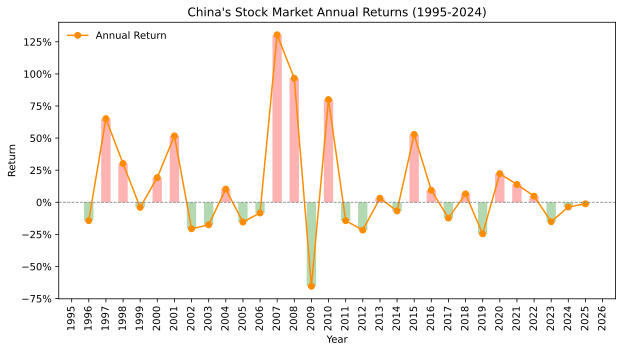

In [22]:
# 画图
fig, ax = plt.subplots(figsize=(10, 5)) # 图片比例
ax.plot(
    Year_data.index,  # x轴数据
    Year_data['Ret'],  # y轴数据
    'o-',  # 线的类型，使用圆点标记每年的数据点
    color = '#FF8C00',  # 线的颜色，使用橙色以区分月度和季度图
    label = 'Annual Return',  # 更改标签为年度收益
    linewidth = 1.5,  # 线的粗细，略微加粗以突出年度数据
)
ax.set_title("China's Stock Market Annual Returns (1995-2024)") # 更精确的标题
ax.set_xlabel('Year') # 更改x轴名称
plt.ylabel('Return') # y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每1年显示一个刻度

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加百分比格式
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 添加水平参考线表示零收益
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# 为正负收益添加不同颜色的填充
for i, year in enumerate(Year_data.index):
    if Year_data['Ret'].iloc[i] >= 0:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='red')
    else:
        ax.bar(year, Year_data['Ret'].iloc[i], width=200, alpha=0.3, color='green')

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)

# 保存图片到images文件夹
fig.savefig('images/Yearly_return.pdf', bbox_inches='tight')
plt.show();

# 我们需要思考下面的问题：

- Is the stock market return constant or time-varying?
  - constant
    - $ r_t = a + \epsilon_{t} $, $\epsilon$ 是随机扰动项
  - varying
    - $ r_t = b * k_{t-1} + \epsilon_{t} $
    - 我们找到$k_{t-1}$提前预知 $r_{t}$
- Do you think the stock market return (or we can call it "equity premium") is too high?
  - 股权溢价，“股权**溢价**之谜” equity premium puzzle
- Understand the time-patterns of China's stock market return.

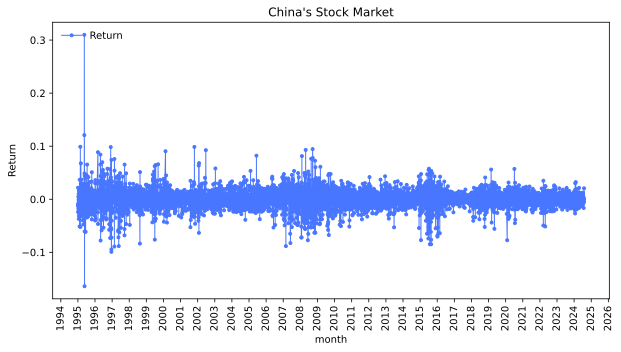

In [24]:
# 画图
fig, ax = plt.subplots(figsize=(10, 5)) # 图片比例
ax.plot(
    'Raw_return',  # 要画图的变量名
    '.-',  # 线的类型
    color = '#4876FF',  # 线的颜色 RGB
    label = 'Return',  # 这个是线的类别，主要是在多条线画图的时候，起到区别的作用，单条线这个没有影响
    linewidth = 1,  # 线的粗细
    data = data_new['1995-01-01':'2024-07-31'])  # 画图的数据
ax.set_title("China's Stock Market") # 画图的标题
ax.set_xlabel('month') # 画图的x轴名称
plt.ylabel('Return') # 画图的y轴名称

# 设置x轴的日期格式
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# # 设置x轴的刻度间隔
ax.xaxis.set_major_locator(mdates.YearLocator())

# 旋转x轴标签以防止重叠
plt.xticks(rotation=90)

# 添加图例
plt.legend(loc='upper left', frameon=False, fontsize=10)
fig.savefig('images/Daily_return.pdf', bbox_inches='tight')# 更改输出图片格式 jpg
plt.show();

## 累计收益与最大回撤
通过累计收益率和最大回撤可以快速判断长期投资的盈亏路径及风险暴露。


In [27]:
data_new['Cum_return'] = (1 + data_new['Raw_return']).cumprod() - 1

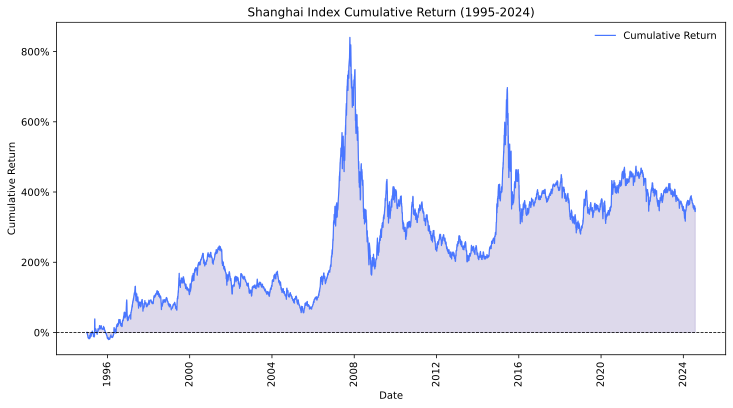

In [32]:
# Cumulative return of Shanghai Index (base=0)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_new.index, data_new['Cum_return'], color='#4876FF', linewidth=1.2, label='Cumulative Return')
ax.fill_between(data_new.index, 0, data_new['Cum_return'], color="#1F037D", alpha=0.15)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title('Shanghai Index Cumulative Return (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.legend(frameon=False) # 图例不显示边框
fig.savefig('images/Cumulative_return.pdf', bbox_inches='tight')
plt.show();


## 最大回测
- Drawdown = 当前收益率 - 历史最高收益率
- Max Drawdown = 最大的回撤
- 最大回撤出现的时间

In [ ]:
# Calculate drawdown
data_new['Peak'] = data_new['Cum_return'].cummax() # 计算历史最高点
data_new['Drawdown'] = data_new['Cum_return'] - data_new['Peak'] # 计算回撤

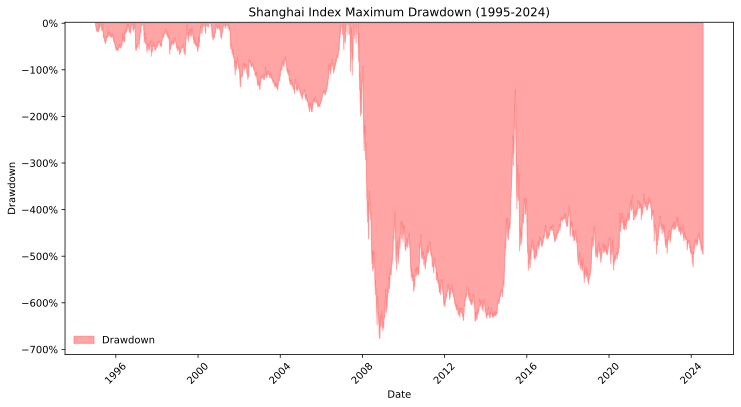

In [36]:
# 最大回撤曲线，关注下行风险
fig, ax = plt.subplots(figsize=(12, 6))
ax.fill_between(data_new.index, data_new['Drawdown'], 0, color='#FF6A6A', alpha=0.6, label='Drawdown')
ax.set_title('Shanghai Index Maximum Drawdown (1995-2024)')
ax.set_xlabel('Date')
ax.set_ylabel('Drawdown')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylim(data_new['Drawdown'].min() * 1.05, 0.02)
plt.xticks(rotation=45)
plt.legend(frameon=False)
fig.savefig('images/Maximum_drawdown.pdf', bbox_inches='tight')
plt.show();


## 月度收益分布与季节效应
观察月度收益率的分布形态与不同月份的差异，评估市场的偏态与季节性。


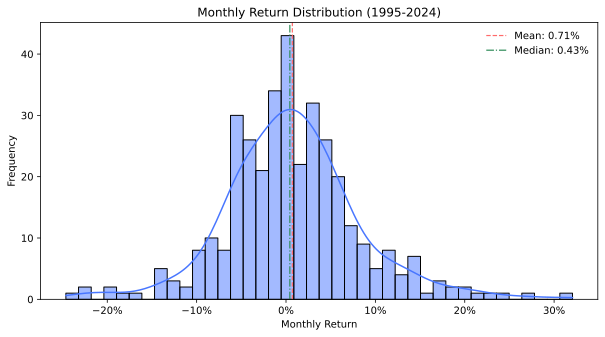

In [ ]:
# 月度收益率分布：看集中度与尾部风险
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(Month_data['Ret'].dropna(), bins=40, kde=True, color='#4876FF', ax=ax)
mean_return = Month_data['Ret'].mean()
median_return = Month_data['Ret'].median()
ax.axvline(mean_return, color='#FF6A6A', linestyle='--', linewidth=1.2, label=f"Mean: {mean_return:.2%}")
ax.axvline(median_return, color='#2E8B57', linestyle='-.', linewidth=1.2, label=f"Median: {median_return:.2%}")
ax.set_title("Monthly Return Distribution (1995-2024)")
ax.set_xlabel('Monthly Return')
ax.set_ylabel('Frequency')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # x轴百分比格式
plt.legend(frameon=False)
fig.savefig('images/Monthly_return_distribution.pdf', bbox_inches='tight')
plt.show();


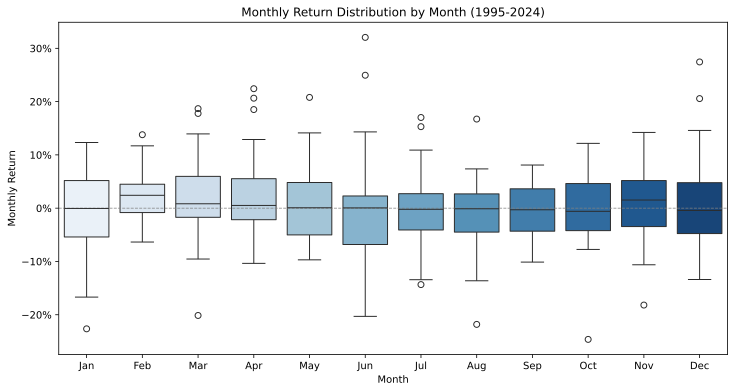

In [ ]:
# Boxplot: Monthly return distribution by month
month_order = list(calendar.month_abbr[1:])
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=Month_data.dropna(subset=['Ret']), x='Month_name', y='Ret', hue='Month_name', order=month_order, palette='Blues', ax=ax, legend=False)  # hue 表示每个箱线图根据月份着色，进一步区分不同月份。palette='Blues' 选择蓝色系配色方案，使不同月份的箱线图颜色有层次变化。
ax.set_title('Monthly Return Distribution by Month (1995-2024)')
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Return')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)  # Add reference line at zero
plt.xticks(rotation=0)
fig.savefig('images/Monthly_return_boxplot.pdf', bbox_inches='tight')
plt.show();


## 月度收益率热力图
通过年份-月份的热力图快速定位高低收益的时间窗口。


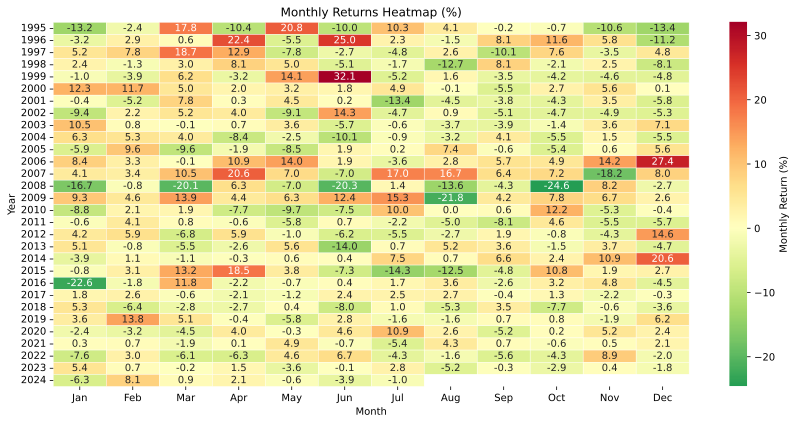

In [ ]:
# Create a year-month pivot table for the heatmap
heatmap_data = Month_data.pivot_table(values='Ret', index='Year', columns='Month', aggfunc='first').sort_index()
heatmap_data.columns = [calendar.month_abbr[m] for m in heatmap_data.columns]

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_data * 100, 
            cmap='RdYlGn_r',  # Red (positive) to Green (negative) colormap
            center=0,       # Center the colormap at zero
            linewidths=0.4, 
            linecolor='white',
            cbar_kws={'label': 'Monthly Return (%)'},
            annot=True,     # Show values in cells
            fmt='.1f',      # Format as 1 decimal place
            ax=ax)

ax.set_title('Monthly Returns Heatmap (%)')
ax.set_xlabel('Month')
ax.set_ylabel('Year')

plt.tight_layout()
fig.savefig('images/Monthly_heatmap.pdf', bbox_inches='tight')
plt.show();


## 收益率的自相关的图

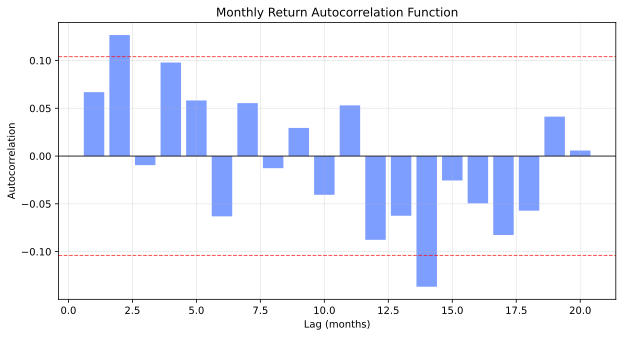

In [60]:
from statsmodels.tsa.stattools import acf

# 计算自相关函数
lags = 20
autocorr = acf(Month_data['Ret'].dropna(), nlags=lags, fft=True)

# 删除第一个数据点（lag=0，值为1）
autocorr_no_zero = autocorr[1:]

# 绘制自相关图
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, lags+1), autocorr_no_zero, alpha=0.7, color='#4876FF')
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=1.96/np.sqrt(len(Month_data['Ret'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-1.96/np.sqrt(len(Month_data['Ret'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Monthly Return Autocorrelation Function')
ax.set_xlabel('Lag (months)')
ax.set_ylabel('Autocorrelation')
ax.grid(True, alpha=0.3)

fig.savefig('images/Return_autocorrelation.pdf', bbox_inches='tight')
plt.show();

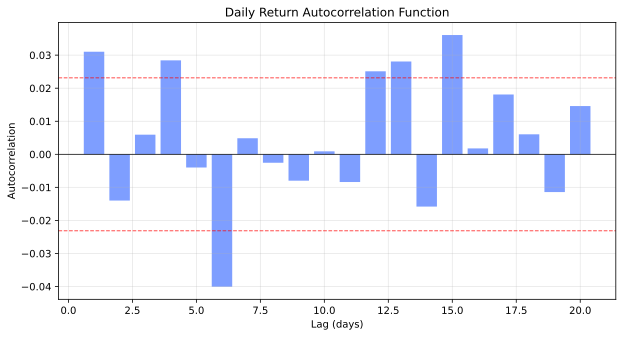

In [62]:
from statsmodels.tsa.stattools import acf

# 日数据的自相关的图

lags = 20
daily_autocorr = acf(data_new['Raw_return'].dropna(), nlags=lags, fft=True)

# 删除第一个数据点（lag=0，值为1）
daily_autocorr_no_zero = daily_autocorr[1:]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(1, lags+1), daily_autocorr_no_zero, alpha=0.7, color='#4876FF')
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axhline(y=1.96/np.sqrt(len(data_new['Raw_return'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.axhline(y=-1.96/np.sqrt(len(data_new['Raw_return'].dropna())), color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Daily Return Autocorrelation Function')
ax.set_xlabel('Lag (days)')
ax.set_ylabel('Autocorrelation')   
ax.grid(True, alpha=0.3) # 使网格线更淡一些
fig.savefig('images/Daily_return_autocorrelation.pdf', bbox_inches='tight')
plt.show();

## 年代分析收益率分布

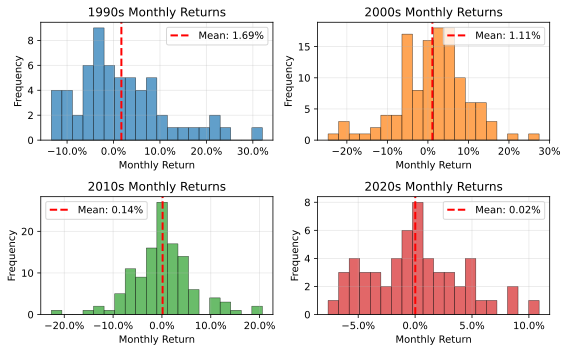

In [55]:
# 按年代分析收益率分布
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
decades = Month_data['Decade'].unique()
decades = sorted([d for d in decades if not pd.isna(d)])

for i, decade in enumerate(decades):
    row = i // 2
    col = i % 2
    decade_data = Month_data[Month_data['Decade'] == decade]['Ret'].dropna()
    
    axes[row, col].hist(decade_data, bins=20, alpha=0.7, color=f'C{i}', edgecolor='black', linewidth=0.5)
    axes[row, col].axvline(decade_data.mean(), color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {decade_data.mean():.2%}')
    axes[row, col].set_title(f'{int(decade)}s Monthly Returns')
    axes[row, col].set_xlabel('Monthly Return')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
fig.savefig('images/Decades_return_distribution.pdf', bbox_inches='tight')
plt.show();